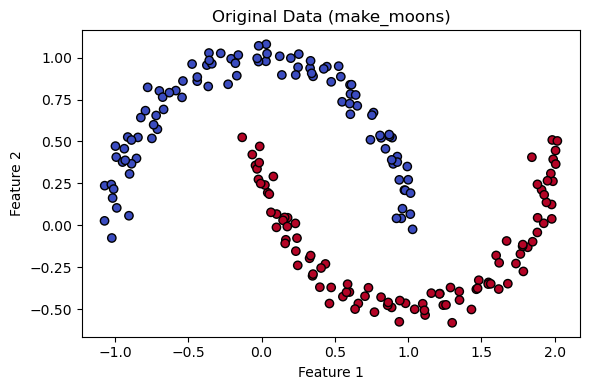

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import AgglomerativeClustering

# 1. 生成月牙形数据
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 2. 可视化原始数据
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
plt.title('Original Data (make_moons)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.tight_layout()
plt.show()


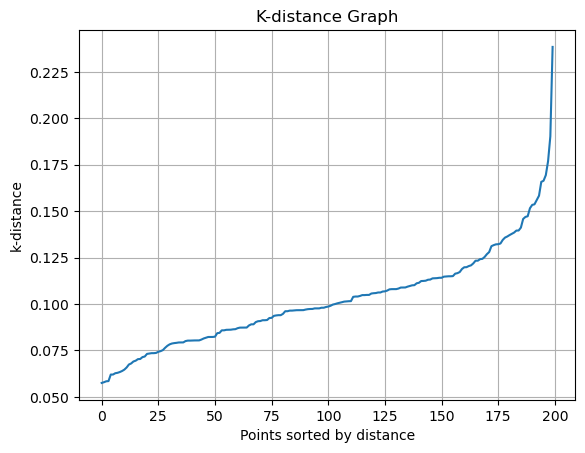

In [2]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

# 设定最小邻居数（同 min_samples）
min_samples = 5

# 计算每个点的第 k 近邻距离
nn = NearestNeighbors(n_neighbors=min_samples)
nn.fit(X)
distances, _ = nn.kneighbors(X)

# 对每个点，取第 k 个最近邻的距离（即 min_samples-1 的位置）
k_distances = np.sort(distances[:, -1])

# 画出 K 距离图
plt.plot(k_distances)
plt.ylabel('k-distance')
plt.xlabel('Points sorted by distance')
plt.title('K-distance Graph')
plt.grid(True)
plt.show()


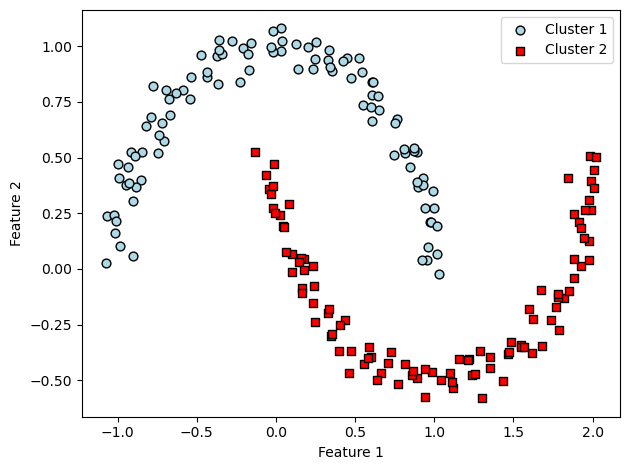

In [3]:
from sklearn.cluster import  DBSCAN
db=DBSCAN(
    eps=0.15, 
    min_samples=5, 
    metric='euclidean'
) 
y_db=db.fit_predict(X) 

plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1],
            c='lightblue', edgecolor='black', marker='o', s=40, label='Cluster 1')

plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1],
            c='red', edgecolor='black', marker='s', s=40, label='Cluster 2')

# 4. 轴标签和图例
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.tight_layout()
plt.show()

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


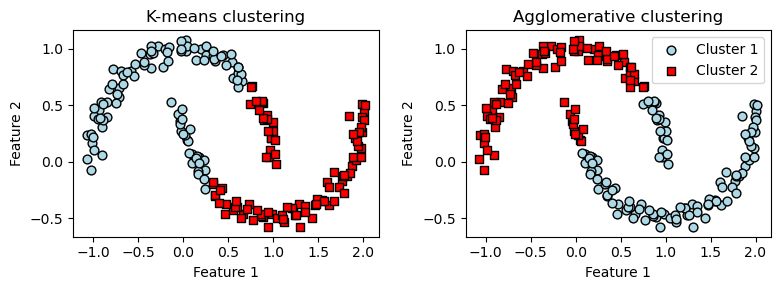

In [4]:
from sklearn.cluster import KMeans
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

# 3. K-means 聚类
km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)

ax1.scatter(X[y_km == 0, 0], X[y_km == 0, 1],
            c='lightblue', edgecolor='black', marker='o', s=40, label='Cluster 1')

ax1.scatter(X[y_km == 1, 0], X[y_km == 1, 1],
            c='red', edgecolor='black', marker='s', s=40, label='Cluster 2')

ax1.set_title('K-means clustering')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')

# 4. Agglomerative clustering（完全连接）
ac = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='complete')
y_ac = ac.fit_predict(X)

ax2.scatter(X[y_ac == 0, 0], X[y_ac == 0, 1],
            c='lightblue', edgecolor='black', marker='o', s=40, label='Cluster 1')

ax2.scatter(X[y_ac == 1, 0], X[y_ac == 1, 1],
            c='red', edgecolor='black', marker='s', s=40, label='Cluster 2')

ax2.set_title('Agglomerative clustering')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')

# 5. 整体设置
plt.legend()
plt.tight_layout()
plt.show()